In [1]:
from jcm.model import SpeedyModel
import jax

jax.config.update('jax_disable_jit', False) # Turn off JIT because of an issue in shortwave_radiation.py:169
jax.config.update("jax_debug_infs", True) # doesn't add any time since the saved time is otherwise spent getting the nodal quantities
jax.config.update("jax_debug_nans", False) # some physics fields might be nan


In [2]:
model = SpeedyModel(time_step=30, save_interval=1, total_time=3, layers=8, boundary_file='/home/jvm/su24/jax-gcm/jcm/data/bc/t30/clim/boundaries_daily.nc') # takes 40 seconds on laptop gpu
state = model.get_initial_state()
final_state, predictions = model.unroll(state)

TypeError: where requires ndarray or scalar arguments, got <class 'pint.Quantity'> at position 1.

In [3]:
pred_ds = model.predictions_to_xarray(predictions)

/home/jvm/su24/jax-gcm/jcm/model.py:284: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  pred_ds['time'] = (self.start_date.delta.days + pred_ds.time).astype('datetime64[D]')


In [4]:
print(f"dataset size: {pred_ds.nbytes/1e6:.1f}MB")

dataset size: 86.1MB


In [5]:
pred_ds.coords

Coordinates:
  * lon      (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 512B -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * level    (level) float64 64B 0.9375 0.8125 0.6875 ... 0.3125 0.1875 0.0625
  * time     (time) datetime64[ns] 96B 2000-01-04 2000-01-07 ... 2000-02-06

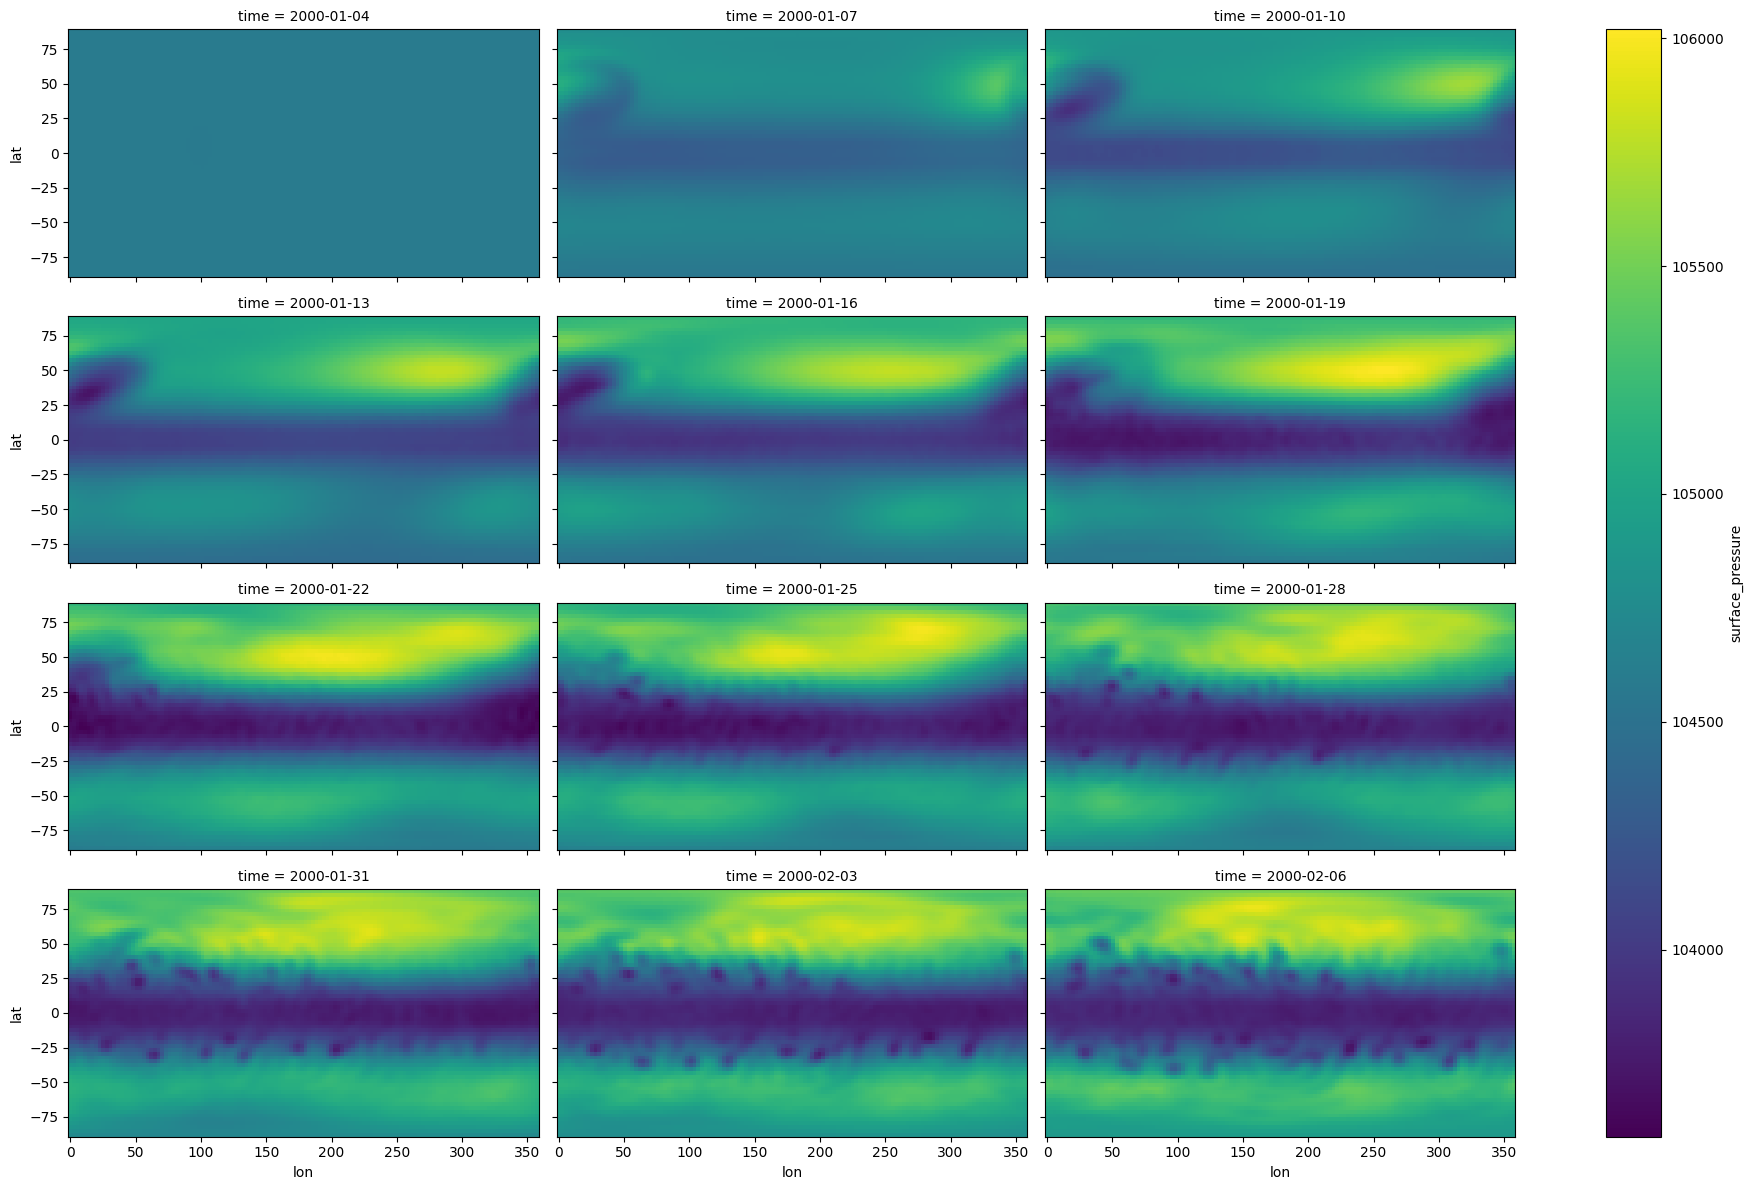

In [6]:
pred_ds['surface_pressure'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);

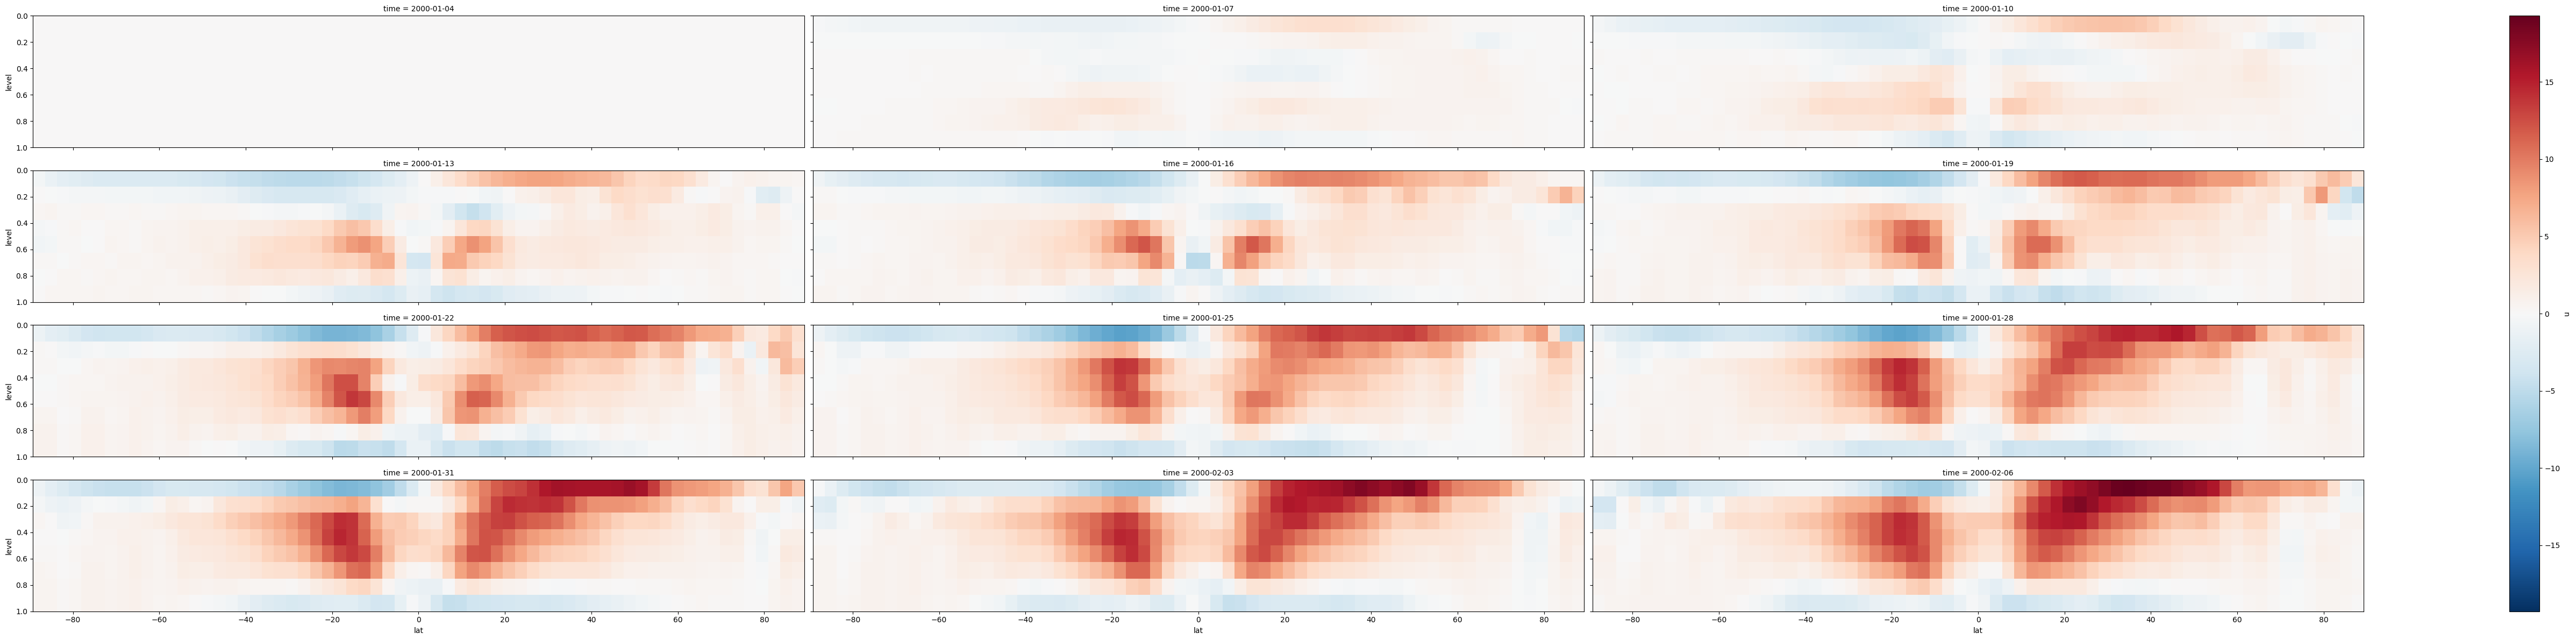

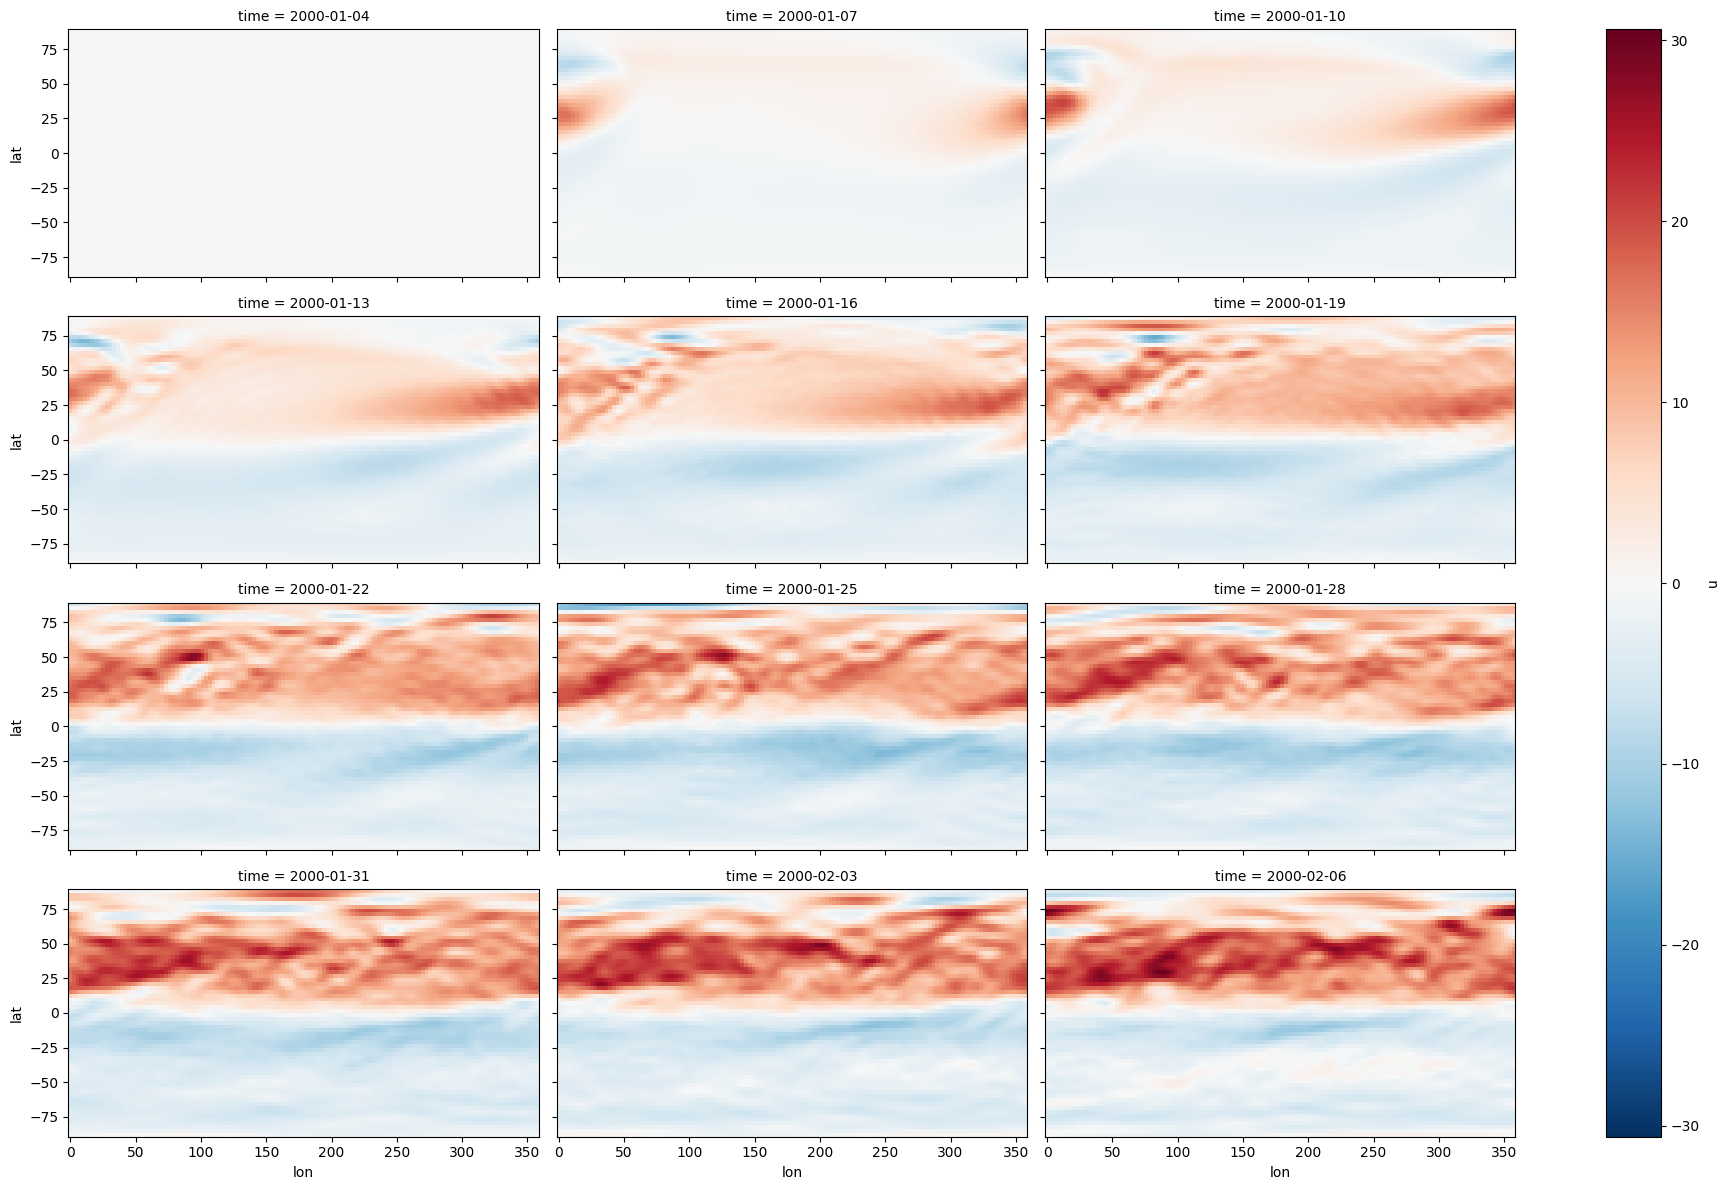

In [7]:
pred_ds['u'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=3, aspect=6, yincrease=False);
pred_ds['u'].isel(level=-1).plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);

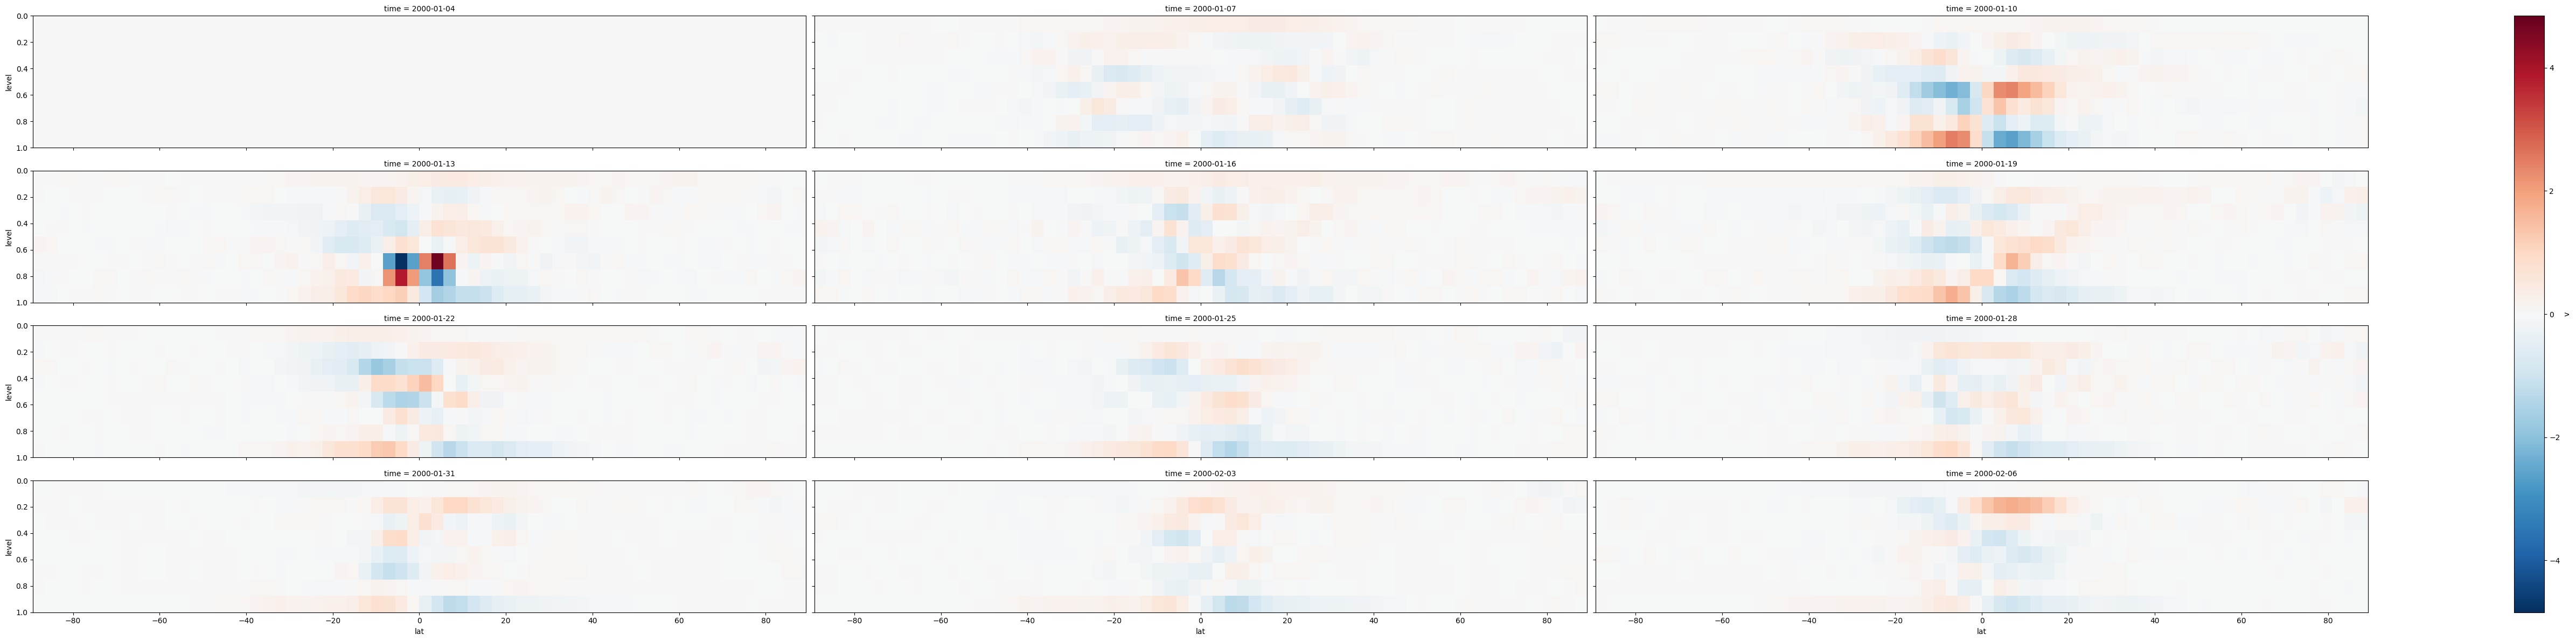

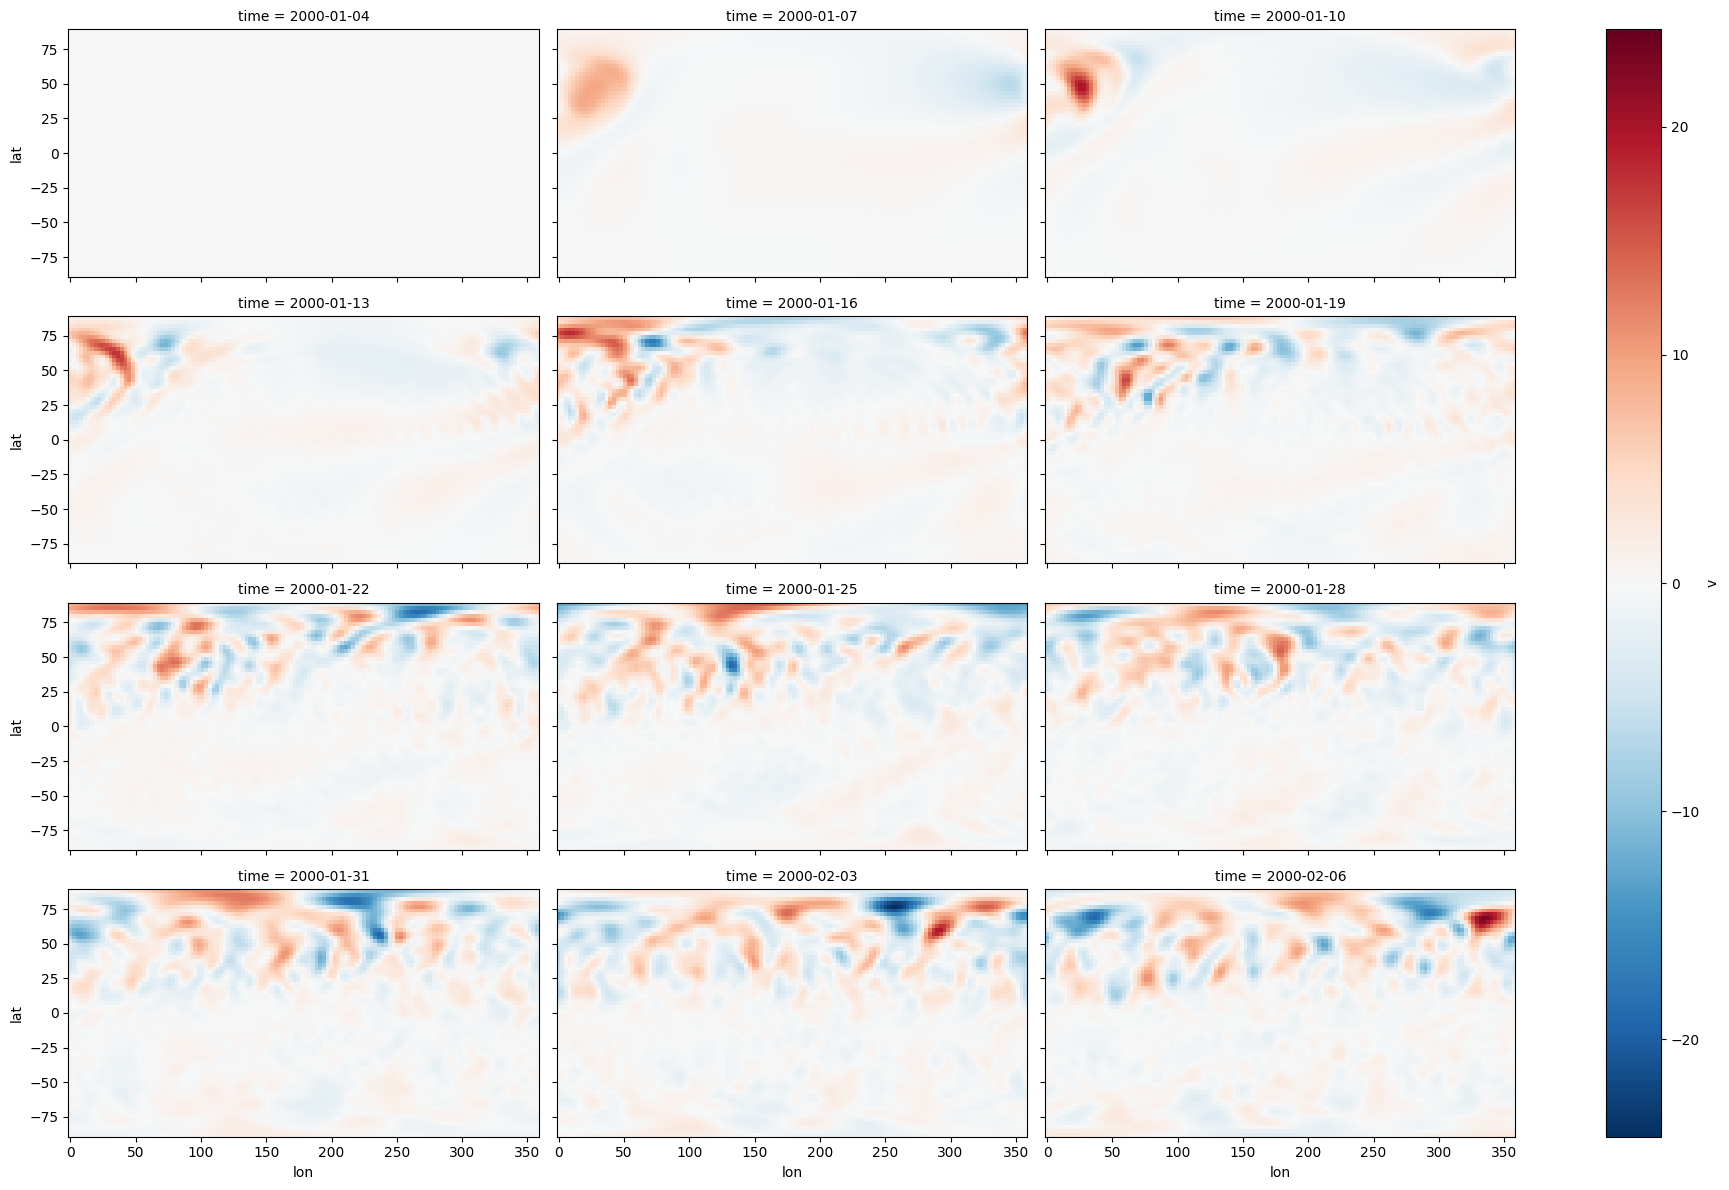

In [8]:
pred_ds['v'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=3, aspect=6, yincrease=False);
pred_ds['v'].isel(level=-1).plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);

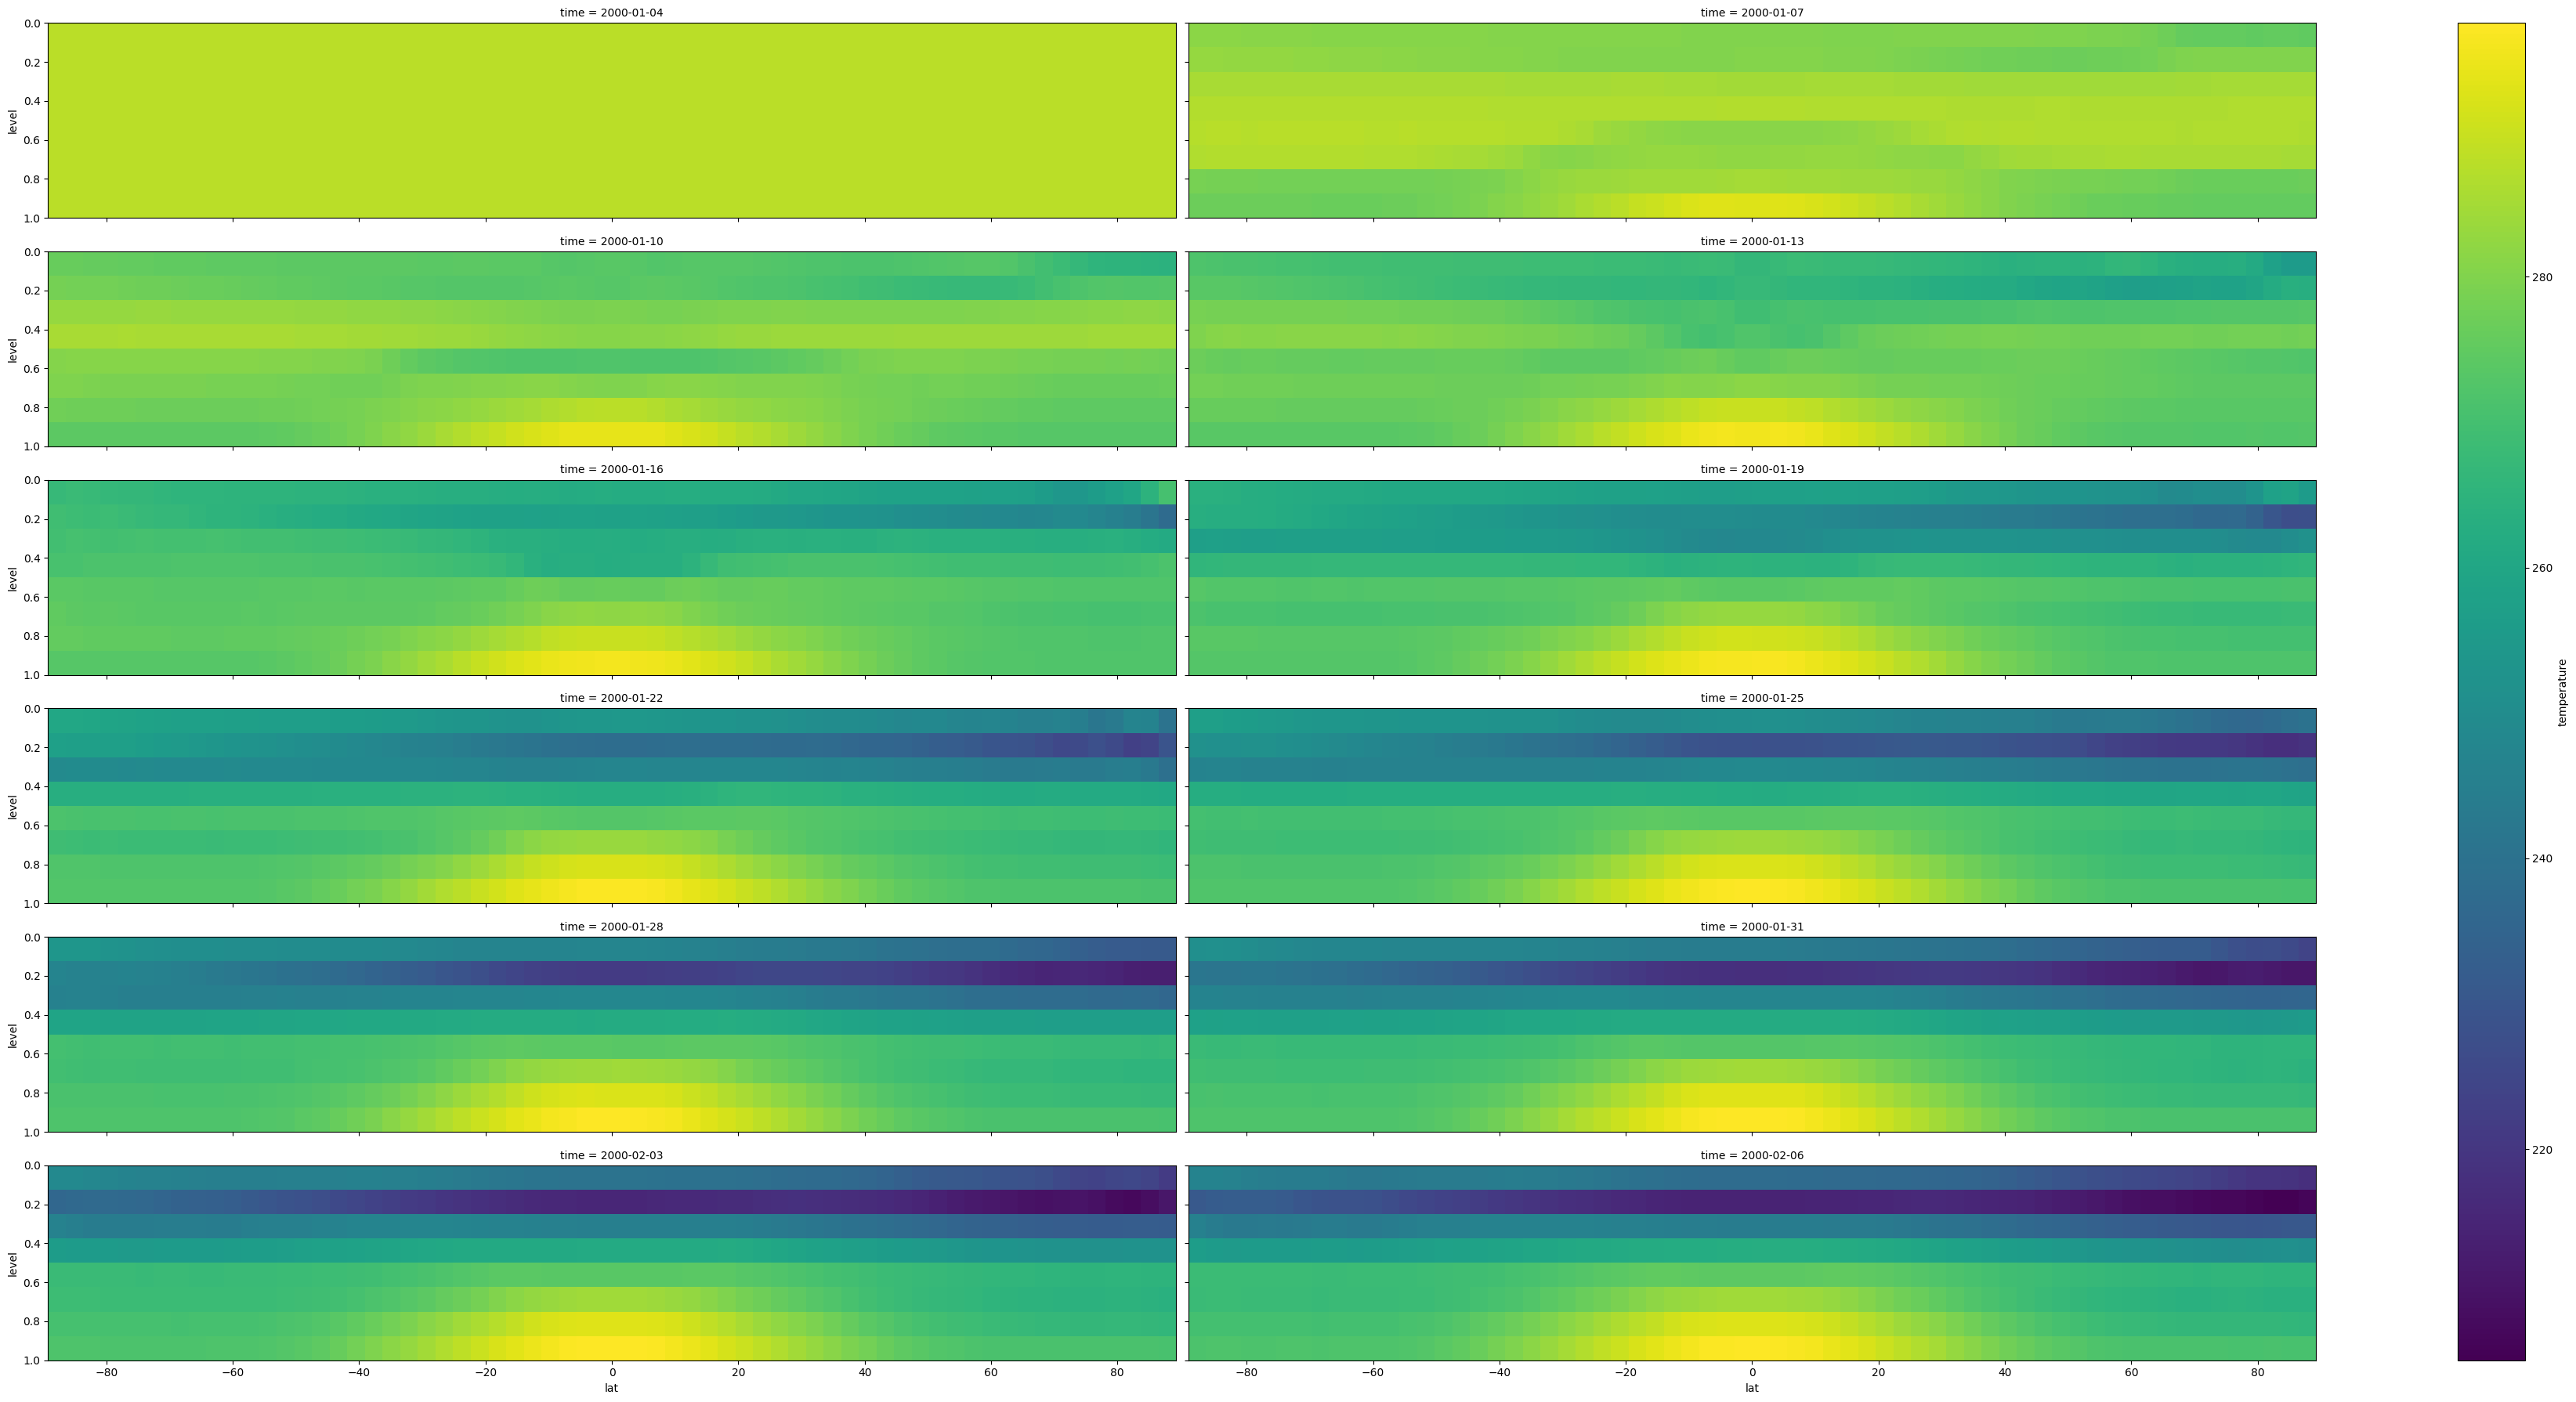

In [9]:
pred_ds['temperature'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=2, aspect=6, yincrease=False);

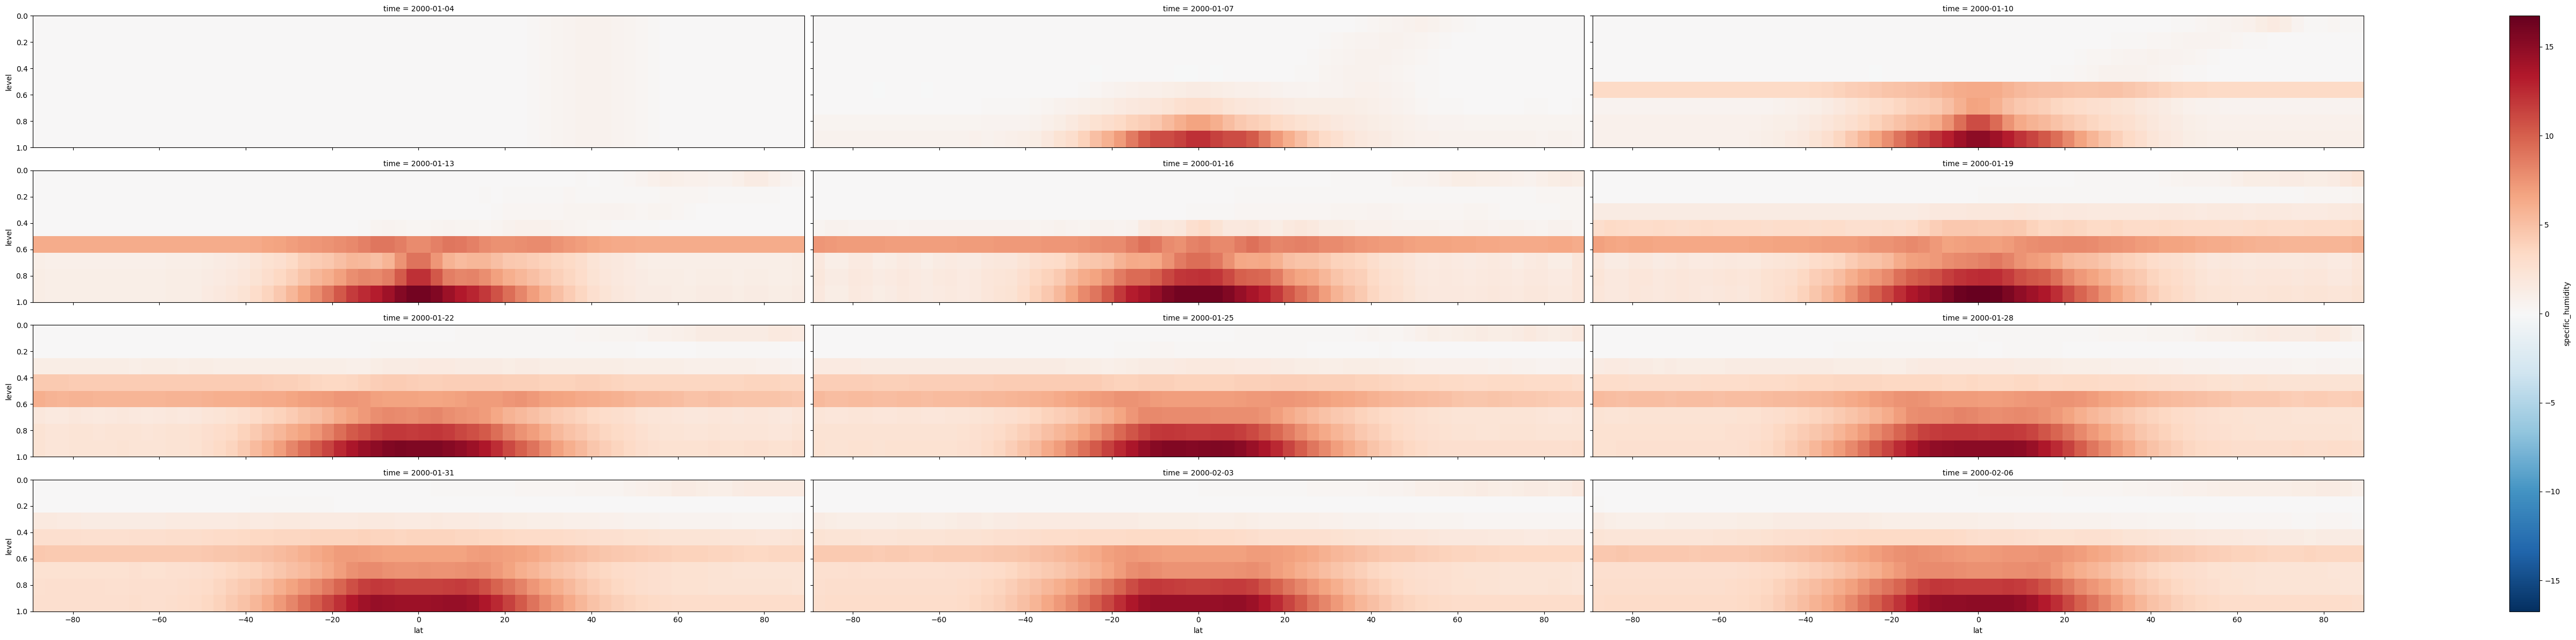

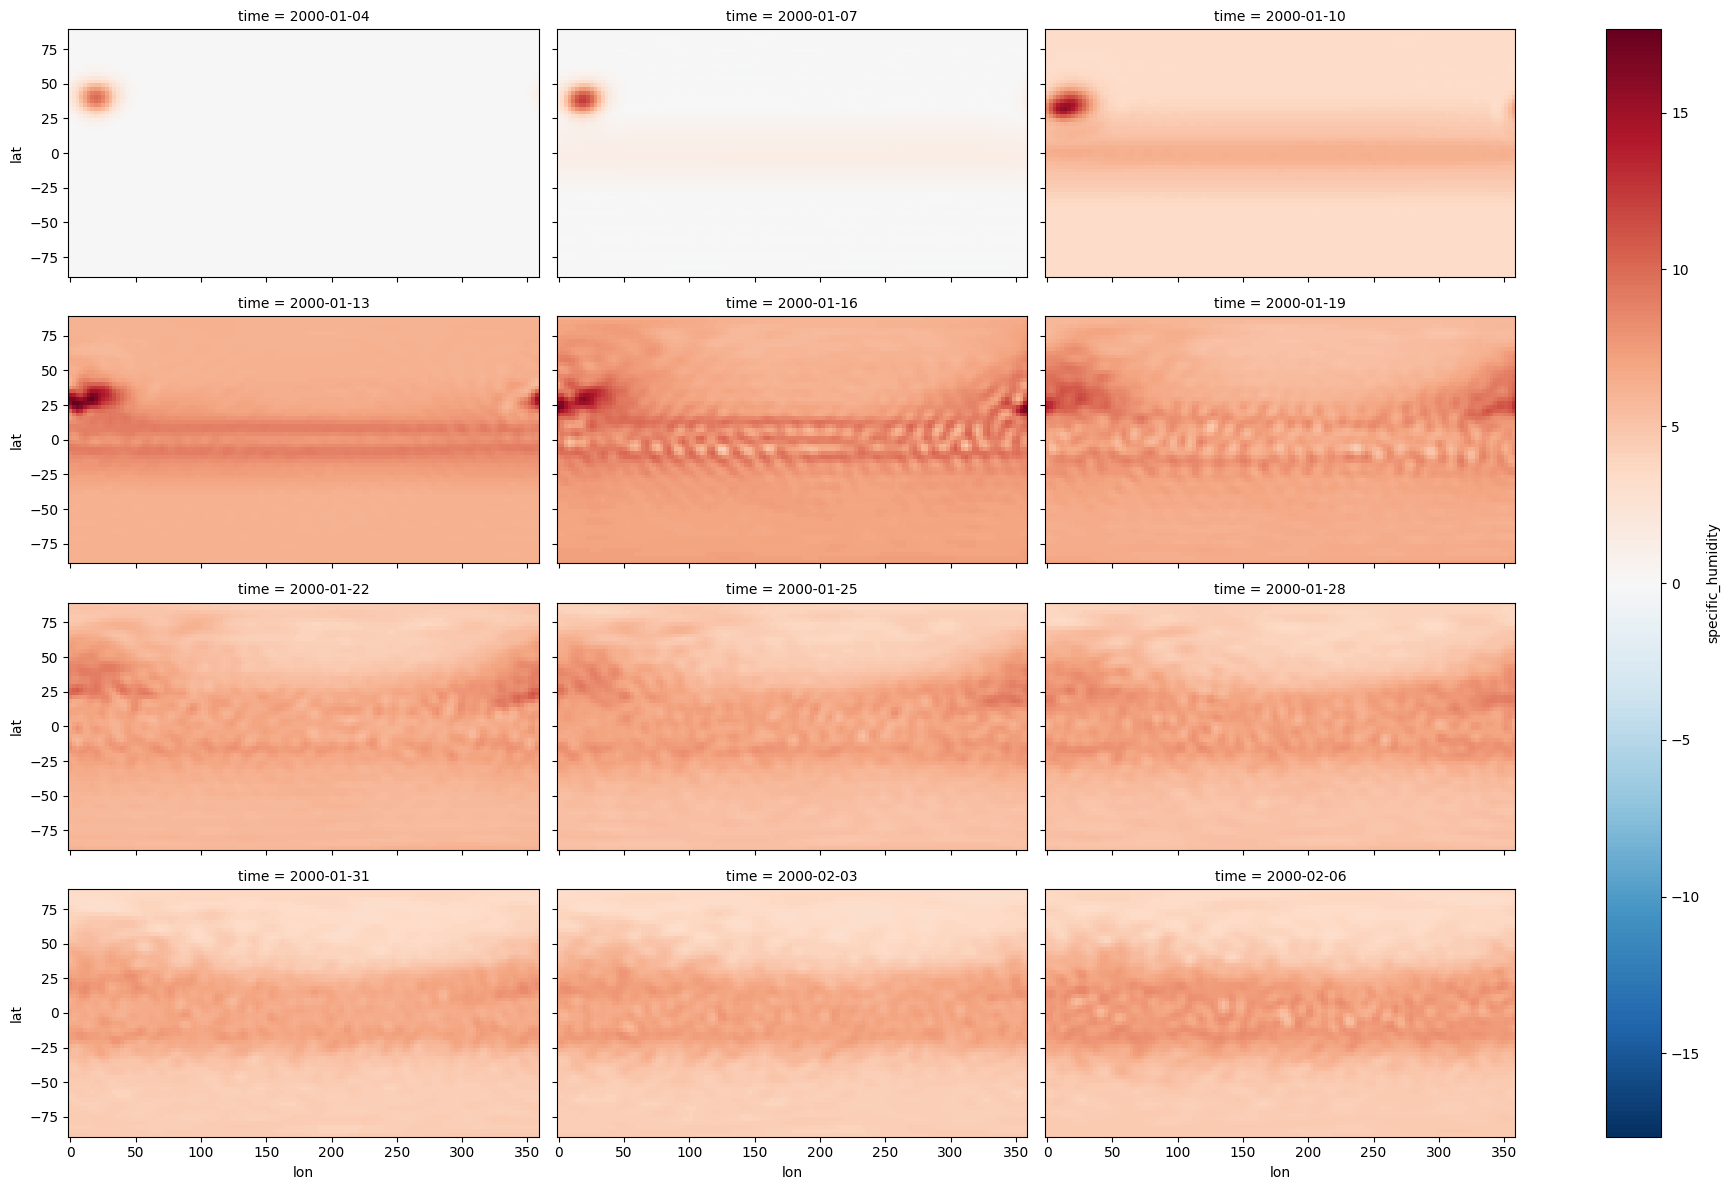

In [10]:
pred_ds['specific_humidity'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=3, aspect=6, yincrease=False);
pred_ds['specific_humidity'].isel(level=3).plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);

### clouds!

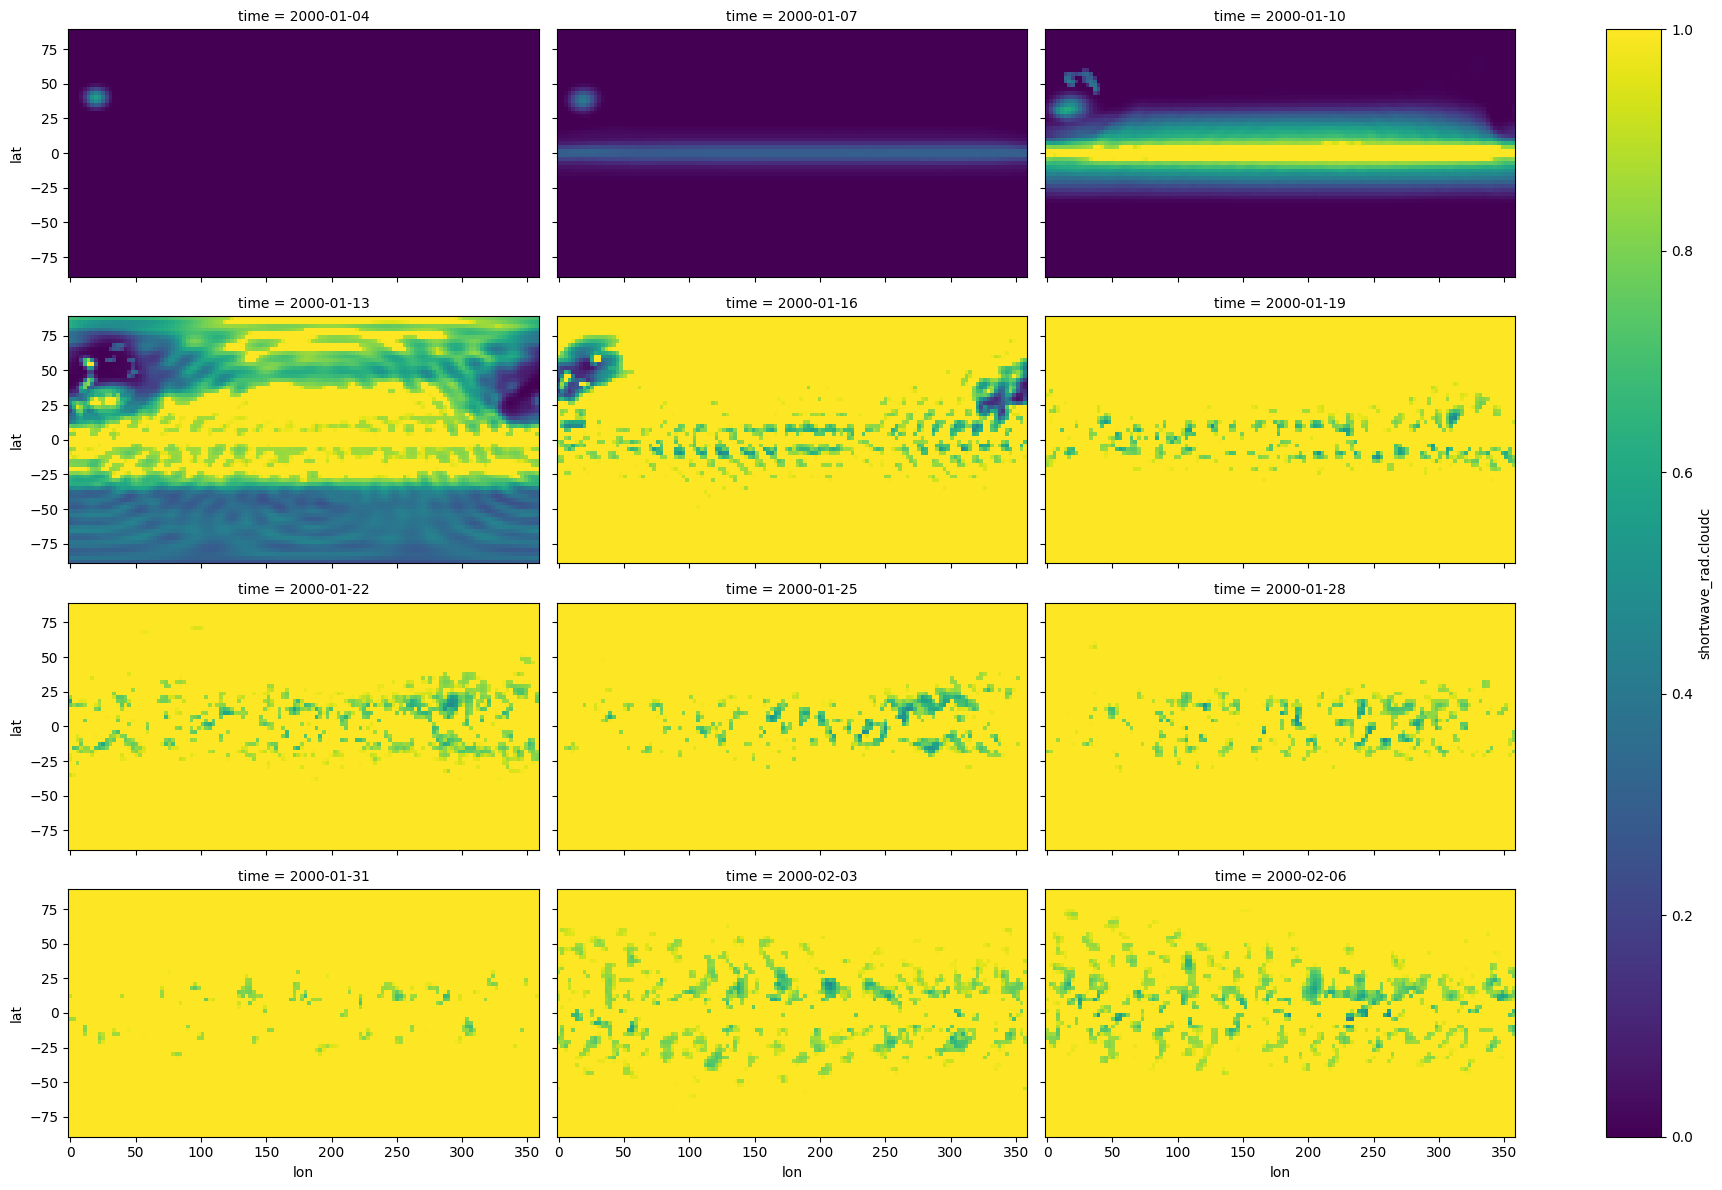

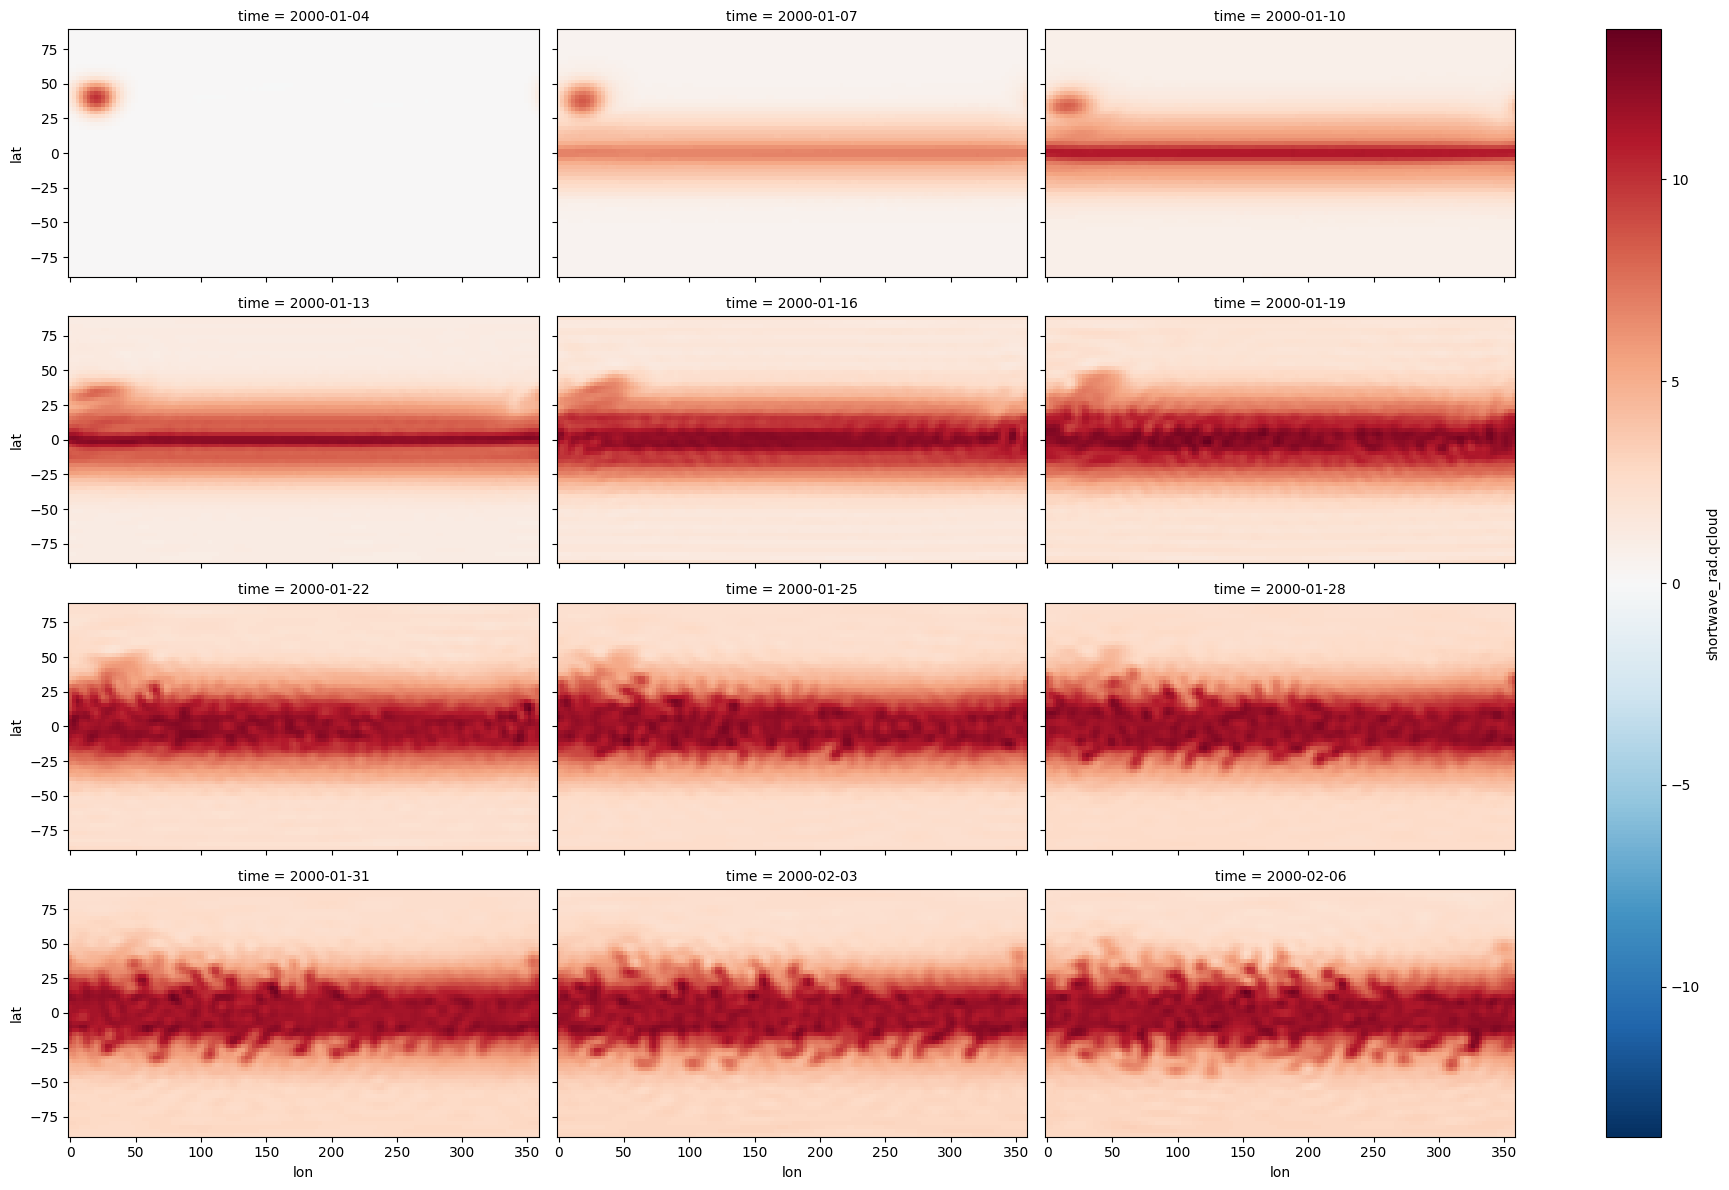

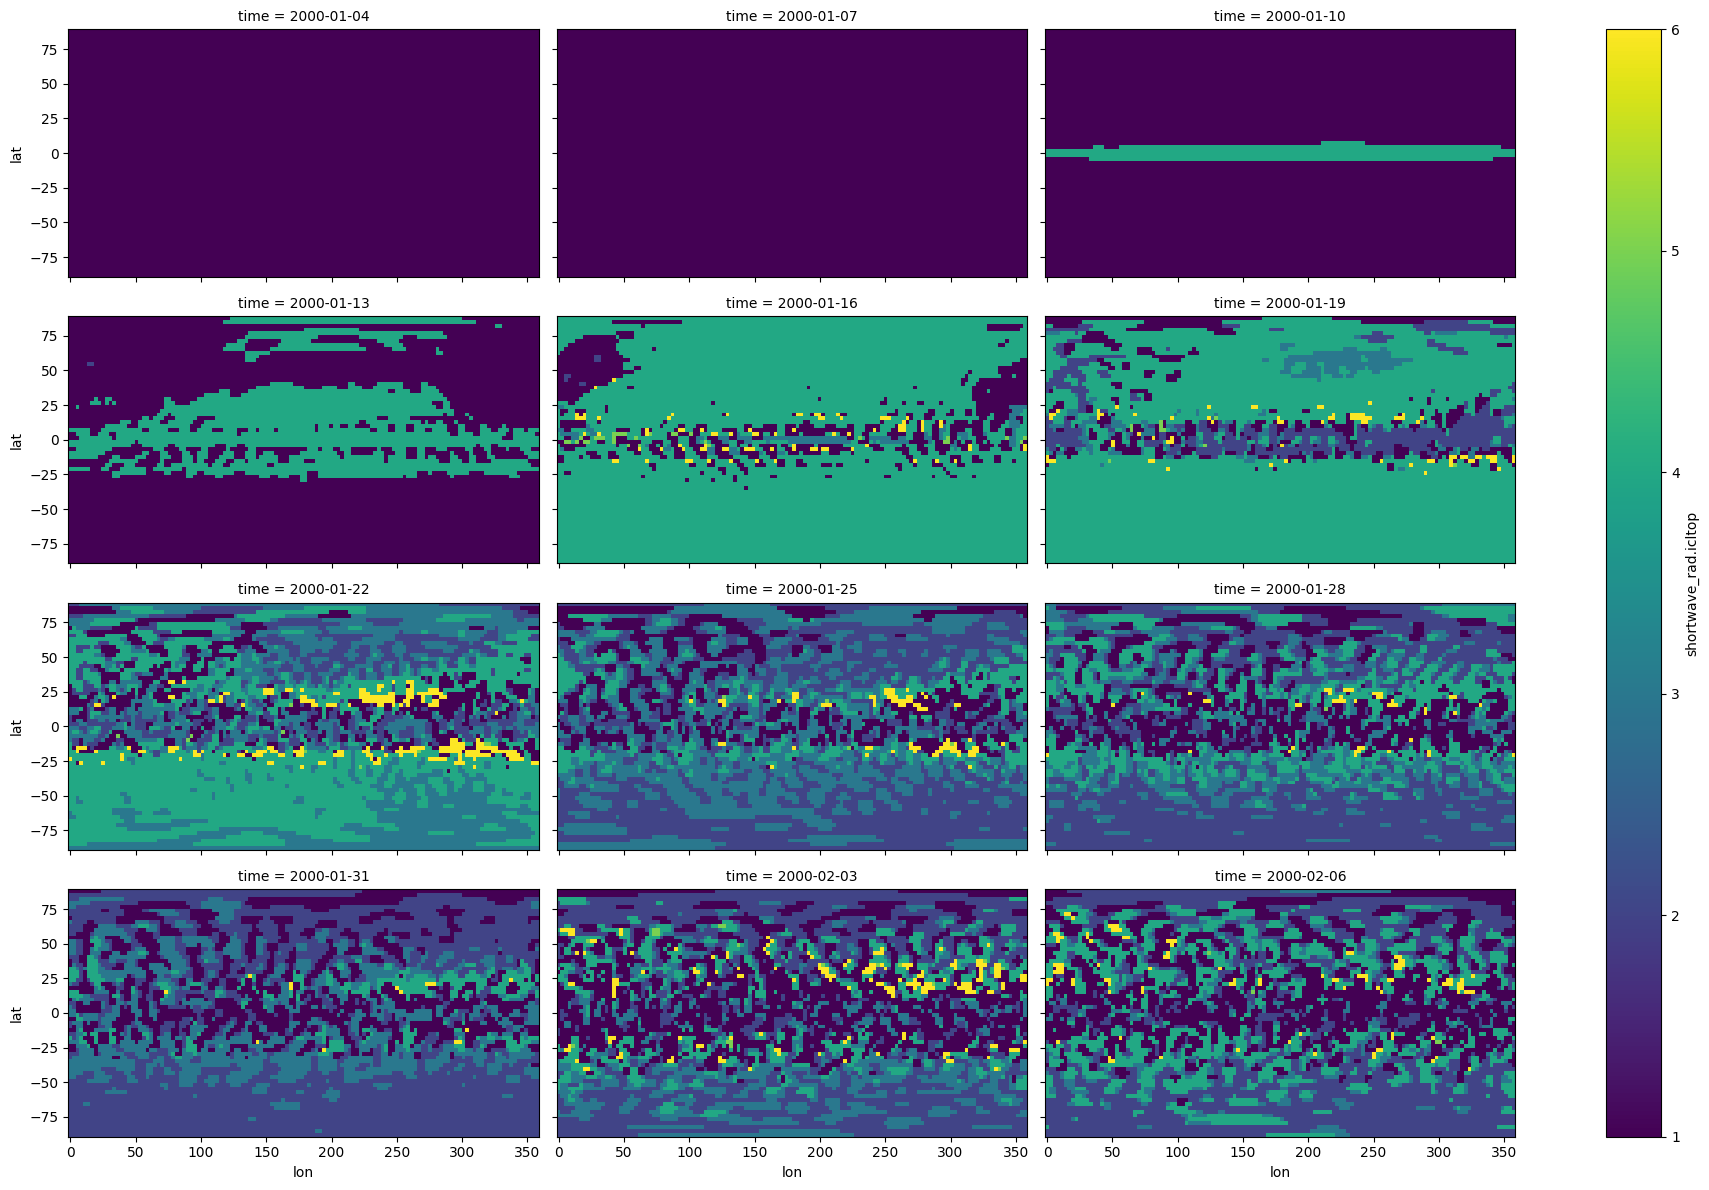

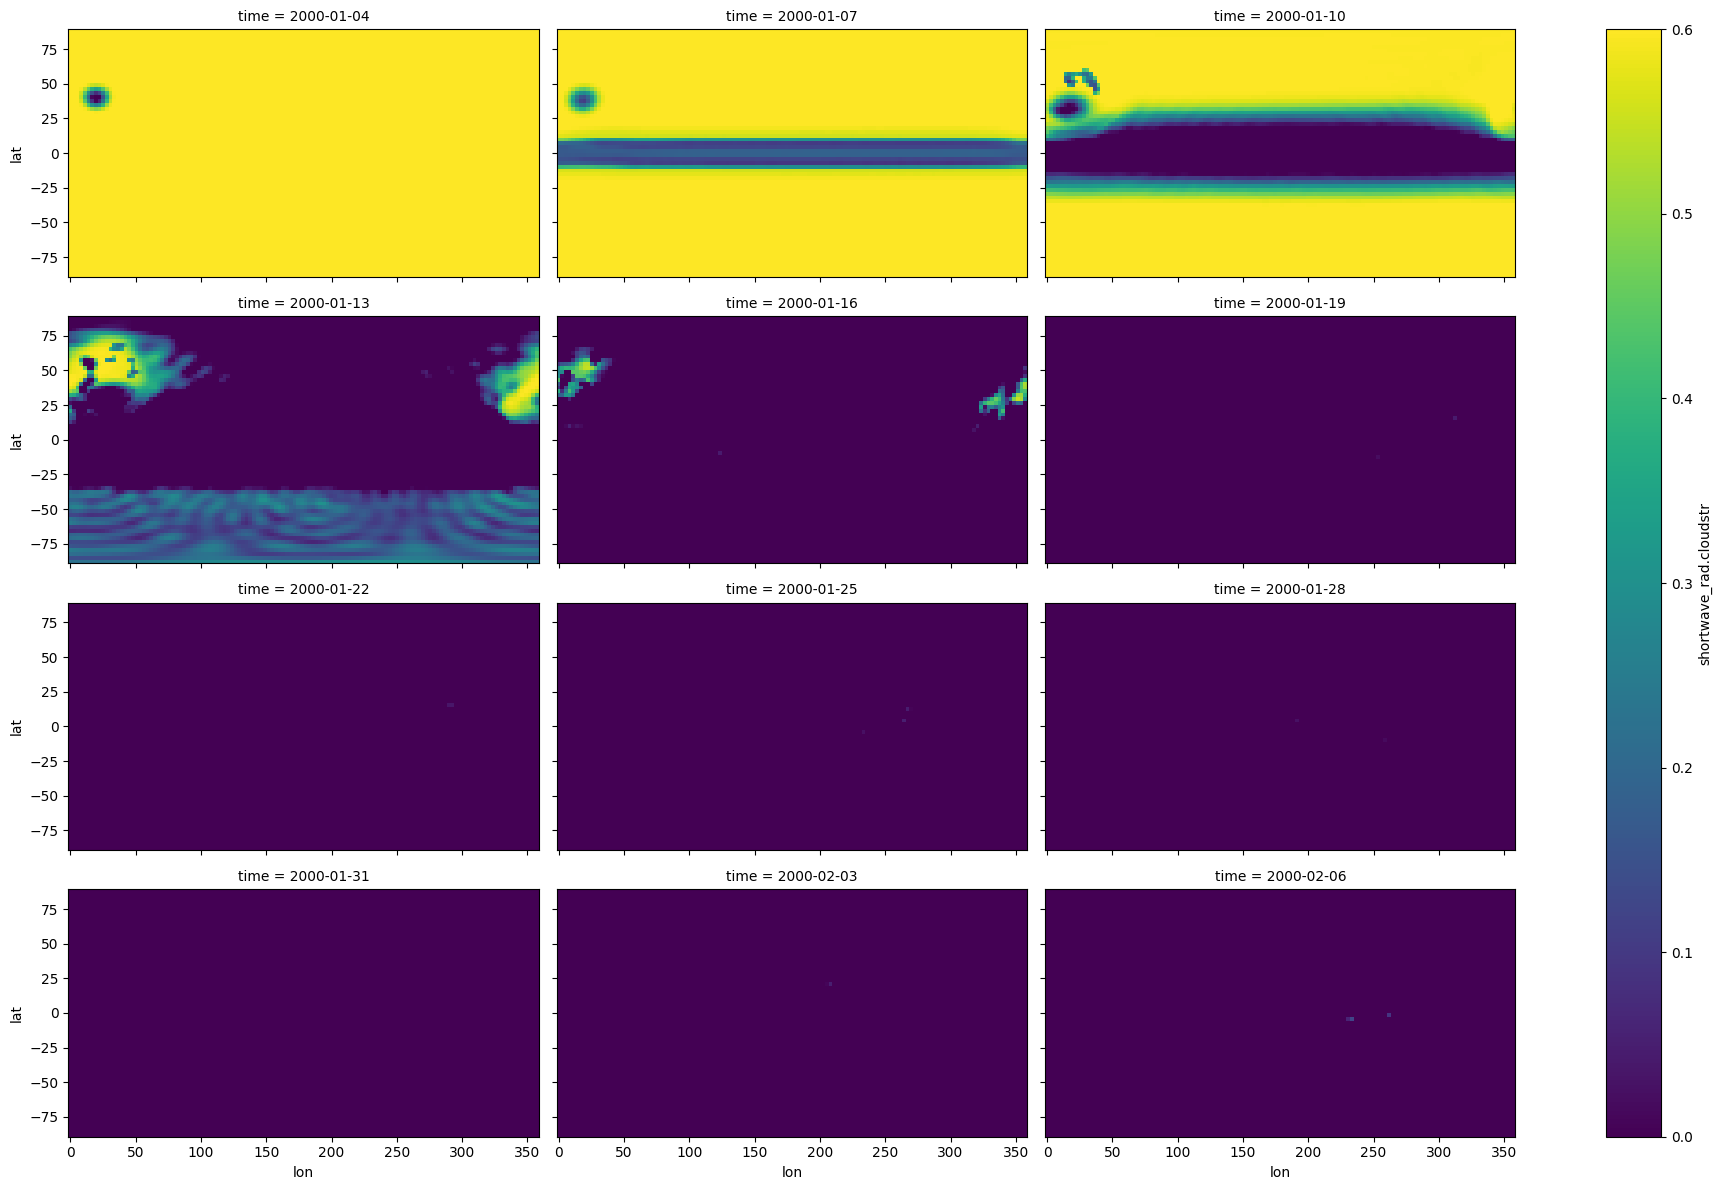

In [11]:
pred_ds['shortwave_rad.cloudc'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);
pred_ds['shortwave_rad.qcloud'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);
pred_ds['shortwave_rad.icltop'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);
pred_ds['shortwave_rad.cloudstr'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);